# Comparaison de méthodes de classification supervisée

Les objectifs de ce TP sont :
- de prendre en main et d'utiliser les méthodes de classification supervisée vues en cours, à l'aide de la libririe [scikit-learn](https://scikit-learn.org/stable/).
- d'évaluer la performance des algorithmes et de les paramétrer au mieux.

## Jeu de données 

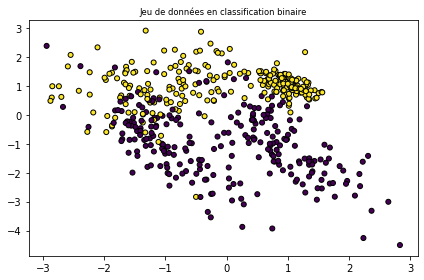

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


plt.title("Jeu de données en classification binaire", fontsize="small")
X, Y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=2)
plt.scatter(X[:, 0], X[:, 1], marker="o", c=Y, s=25, edgecolor="k")
plt.tight_layout()
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25)

## Utilisation des algorithmes de classification

Classer ces donncés en utilisant les algorithmes suivants :
- Un [classifieur naïf de Bayes](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes)
- l'[analyse discriminante linéaire](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html#sklearn.discriminant_analysis.LinearDiscriminantAnalysis)
- l'[analyse discriminante quadratique](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html#sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis)
- l'algorithme des [k plus proches voisins](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)
- les [arbres de décision](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
- les différentes versions de [SVM](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm) vues en cours (linéaire, soft margin, à noyau)

## Optimisation des hyperparamètres
Chaque algorithme dépend de paramètres (`n_neighbors` pour les k plus proches voisins, `max_depth` ou `min_samples_leaf` pour les arbres de décisions, ...) qu'il convient de régler au "mieux". Pour cela vous pourrez utiliser une technique de [validation croisée](https://scikit-learn.org/stable/modules/cross_validation.html) avec [grid search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) qui permet de parcourir l'espace discrétisé des paramètres pour trouver la "meilleure" combinaison.

La validation croisée à k plis (k fold) consiste à : 
- Diviser les données d'apprentissage  en $k$ sous-échantillons de tailles égales.
- Retenir l'un de ces échantillons,  de numéro $i$, pour le test et apprendre sur les $k-1$ autres.
- Mesurer le taux d'erreur empirique
${\widehat{R}}_{\text{Réel}}^{i}(h)$ sur
    l'échantillon $i$.
- Recommencer $k$ fois en faisant varier l'échantillon $i$ de 1 à $k$.
  
L'erreur estimée finale est donnée par la moyenne des erreurs mesurées ${\widehat{R}}_{\text{Réel}}(h) \; = \; \frac{1}{k} \,
    \displaystyle\sum_{i=1}^{k} {\widehat{R}}_{\text{Réel}}^{i}(h)$ 

Par exemple, pour un classifieur MyClassifier, on peut écrire 

`modele = MyClassifier(param1)`

`param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]`

`param_grid = [{'param1': param_range}]`

`gs = GridSearchCV(estimator=modele, param_grid=param_grid, scoring='accuracy', cv=10,n_jobs=-1)`

`gs = gs.fit(X_train, y_train)`

`modele = gs.best_estimator_`

`modele.fit(X_train, y_train)`





## Analyse de performance
Pour les différents algorithmes utilisés, vous pouvez mesurer leur performance grace à l'ensemble de test `(X_test,y_test)` Il vous suffit pour cela de comparer les résultats fournis par vos algorithmes avec la vérité terrain.

Vous pouvez utiliser plusieurs [indices quantitatifs](https://scikit-learn.org/stable/modules/model_evaluation.html) vous permettant de mesurer la performance de vos algorithmes.

On peut par exemple partir de la matrice de confusion $M(i,j)$ d'une algorithme classification, qui est
une matrice $C \times C$ dont l'élément générique donne le nombre d'exemples de l'ensemble de test 
de la classe $i$ qui ont été classés dans la classe $j$.

Dans le cas d'une classification binaire, la matrice de confusion est donc de
la forme :

<table border=4 cellspacing=4 cellpadding=4 width=80%>
    <tr>
        <td align=center>prédite/réelle</td>
        <td align=center>+ (P)</td>
        <td align=center>- (N)</td>
    </tr>
    <tr>
        <td>+</td>
        <td>Vrais positifs (VP)</td>
        <td>Faux positifs (FP)</td>
    </tr>
    <tr>
        <td>-</td>
        <td>Faux négatifs (FN)</td>
        <td>Vrais négatifs (VN)</td>
    </tr>
</table>

A partir des VP,FP,VN,FN, on déduit plusieurs mesures :

- le [rappel](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html#sklearn.metrics.precision_recall_curve) (recall) : $R = \frac{VP}{VP+FP}$ 
- la [précision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html#sklearn.metrics.precision_recall_curve) : $P = \frac{VP}{VP + FN}$
- la F\_mesure, qui est une moyenne harmonique du rappel et de la précision (avec $\beta > 0$) : $F\_mesure = \frac{(1 + \beta^2) \cdot R \cdot P}{\beta^2 (R + P)}$
- et en particulier, la F1\_mesure; pour $\beta=1$ : $F1\_mesure = \frac{2 \cdot R \cdot P}{R+P}$



- la [ROC-curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) : dans un contexte de prise de décision, il peut être utile de prendre en compte non seulement un taux d'erreur, mais aussi les taux de FP et de FN. Souvent, en effet, le coût de mauvaise classification n'est pas symétrique et l'on peut préférer avoir un taux d'erreur un peu moins bon si cela permet de réduire le type d'erreur le plus coûteux. La courbe  (Receiver Operating Characteristic) permet de régler ce compromis. Intéressons nous par exemple à un problème de classification à deux classes. Si la sortie du classifieur (fonction de décision) s'appuie sur une fonction  à valeur réelle définie sur l'espace des entrées , on peut calculer pour chaque classe la probabilité d'appartenir à cette classe en fonction de la valeur de sortie de la fonction . Pour chaque seuil de décision, on peut calculer la proportion de VP (fraction des exemples de la classe  étiquetés comme  à partir du seuil de décision) et de FP. On reporte alors la proportion de VP en fonction de celle des FP, et le graphique résultant est la courbe ROC. Idéalement, si la fonction  permet de séparer complètement les deux distributions de probabilité correspondant aux deux classes (apprentissage parfait), on peut obtenir 100 % de VP pour 100 % de FP pour un seuil donné passant entre les deux courbes. En revanche, si les deux distributions se superposent parfaitement (aucune discrimination), alors, pour chaque seuil de décision, il y a autant de VP que de FP. La courbe ROC est alors la droite correspondant à la fonction identité. Plus la courbe s'incurve vers le haut, plus le test est pertinent. La pertinence est mesurée par l'aire sous la courbe (AUC : Area Under the Curve). Lorsque l'on a trouvé un système de classification suffisamment bon,
il reste à choisir le seuil pour un diagnostic classe `+` / classe `-`.  Ce
choix doit fournir une proportion de VP élevée sans
entraîner une proportion inacceptable de FP.  Chaque point de la
courbe représente un seuil particulier, allant du plus sévère (limitant
le nombre de FP au prix de nombreux exemples de la classe `+` non
diagnostiqués (forte proportion de FN, et donc faible
proportion de VP), aux plus laxistes (augmentant le nombre de VP au prix de nombreux FP). Le
seuil optimal pour une application donnée dépend de facteurs tels que les
coûts relatifs des FP et FN, comme de celui de la  prévalence de la classe `+`. 


On peut comparer plusieurs systèmes d'apprentissage à l'aide de leurs courbes ROC. Si, pour une tâche donnée, un système a une courbe uniformément supérieure à celle de l'autre système, alors on peut conclure qu'il a un meilleur pouvoir discriminant. En revanche, il peut arriver que les courbes ROC correspondant aux deux systèmes se chevauchent. Dans ce cas, chaque système est supérieur à l'autre pour un intervalle de valeurs du critère de décision et le choix doit s'opérer sur la base des coûts relatifs des FP et des FN.